<h2>Import packages and data</h2>

In [1]:
from scipy.io import netcdf
import similarity_measures as sim
import calculations as calc
import matplotlib as plt
import comparing as comp
import combining as comb
import plots
import numpy as np

In [2]:
plt.rcParams.update({'font.size': 30})

In [3]:
nc_l30 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l30-u.nc")

In [4]:
nc_l70 = netcdf.netcdf_file("data/era-int_pl_1979-2019-mm-l70-u.nc")

<h2>Derive QBO and prepare datasets</h2>

In [5]:
lon = calc.convert_coordinates_to_grid(nc_l30.variables["longitude"][:], 180)
lat = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0)

lon_step = 256 #Around the whole equator
lat_step = calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 0) - calc.convert_coordinates_to_grid(nc_l30.variables["latitude"][:], 5)


u_l30 = nc_l30.variables["u"]

#Deseasonalize
u_l30 = calc.deseasonalize_map(u_l30)

qbo_equator = calc.derive(u_l30[:, :, :, :], lat, lon, 0, lat_step, lon_step)

In [6]:
u_l70 = nc_l70.variables["u"]
u_l70 = calc.deseasonalize_map(u_l70)

<h1>Dependencies to different datasets (containing different levels) for different time delays</h1>

In [7]:
print(plots.plot_time_delayed_similarities_to_different_datasets.__doc__)


    Plot the similarities between a reference series and different datasets delayed by different time steps.

    Before computing the similarity, the dataset is shifted by a given index and the reference series stays unchanged.
    This procedure is repeated for every index-shit (time_shifts) and for every dataset.

    The results are made comparable using the scaling_func. The results of Pearson's Correlation stay unscaled.


    Args:
        datasets (list): List with datasets to compute the similarity to
        dataset_labels (list): List of labels for the datasets
        reference_series (numpy.ndarray): 1 dimensional reference series
                time_shifts (array): List of integers that indicate by how many time units the dataset should be shifted
        measures (function): Similarity measure to compute similarity between two time series
        scaling_func (function, optional): Function that takes a map of similarity values and scales them in order
                 

<h3>We use Pearson's Correlation as similaritiy measure (will not be scaled)</h3>

In [8]:
measure = sim.pearson_correlation

In [9]:
datasets = [u_l30, u_l70]

In [10]:
dataset_labels = ["30 hPa", "70 hPa"]

In [11]:
time_shifts = [0, 1, 3, 12]

C:\Users\tousp\OneDrive\KIT\6. Semester\Bachelorarbeit\Climate-Similarity-Metrics\plots.py:733: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='mill', lon_0=30, resolution='l', ax=axis)


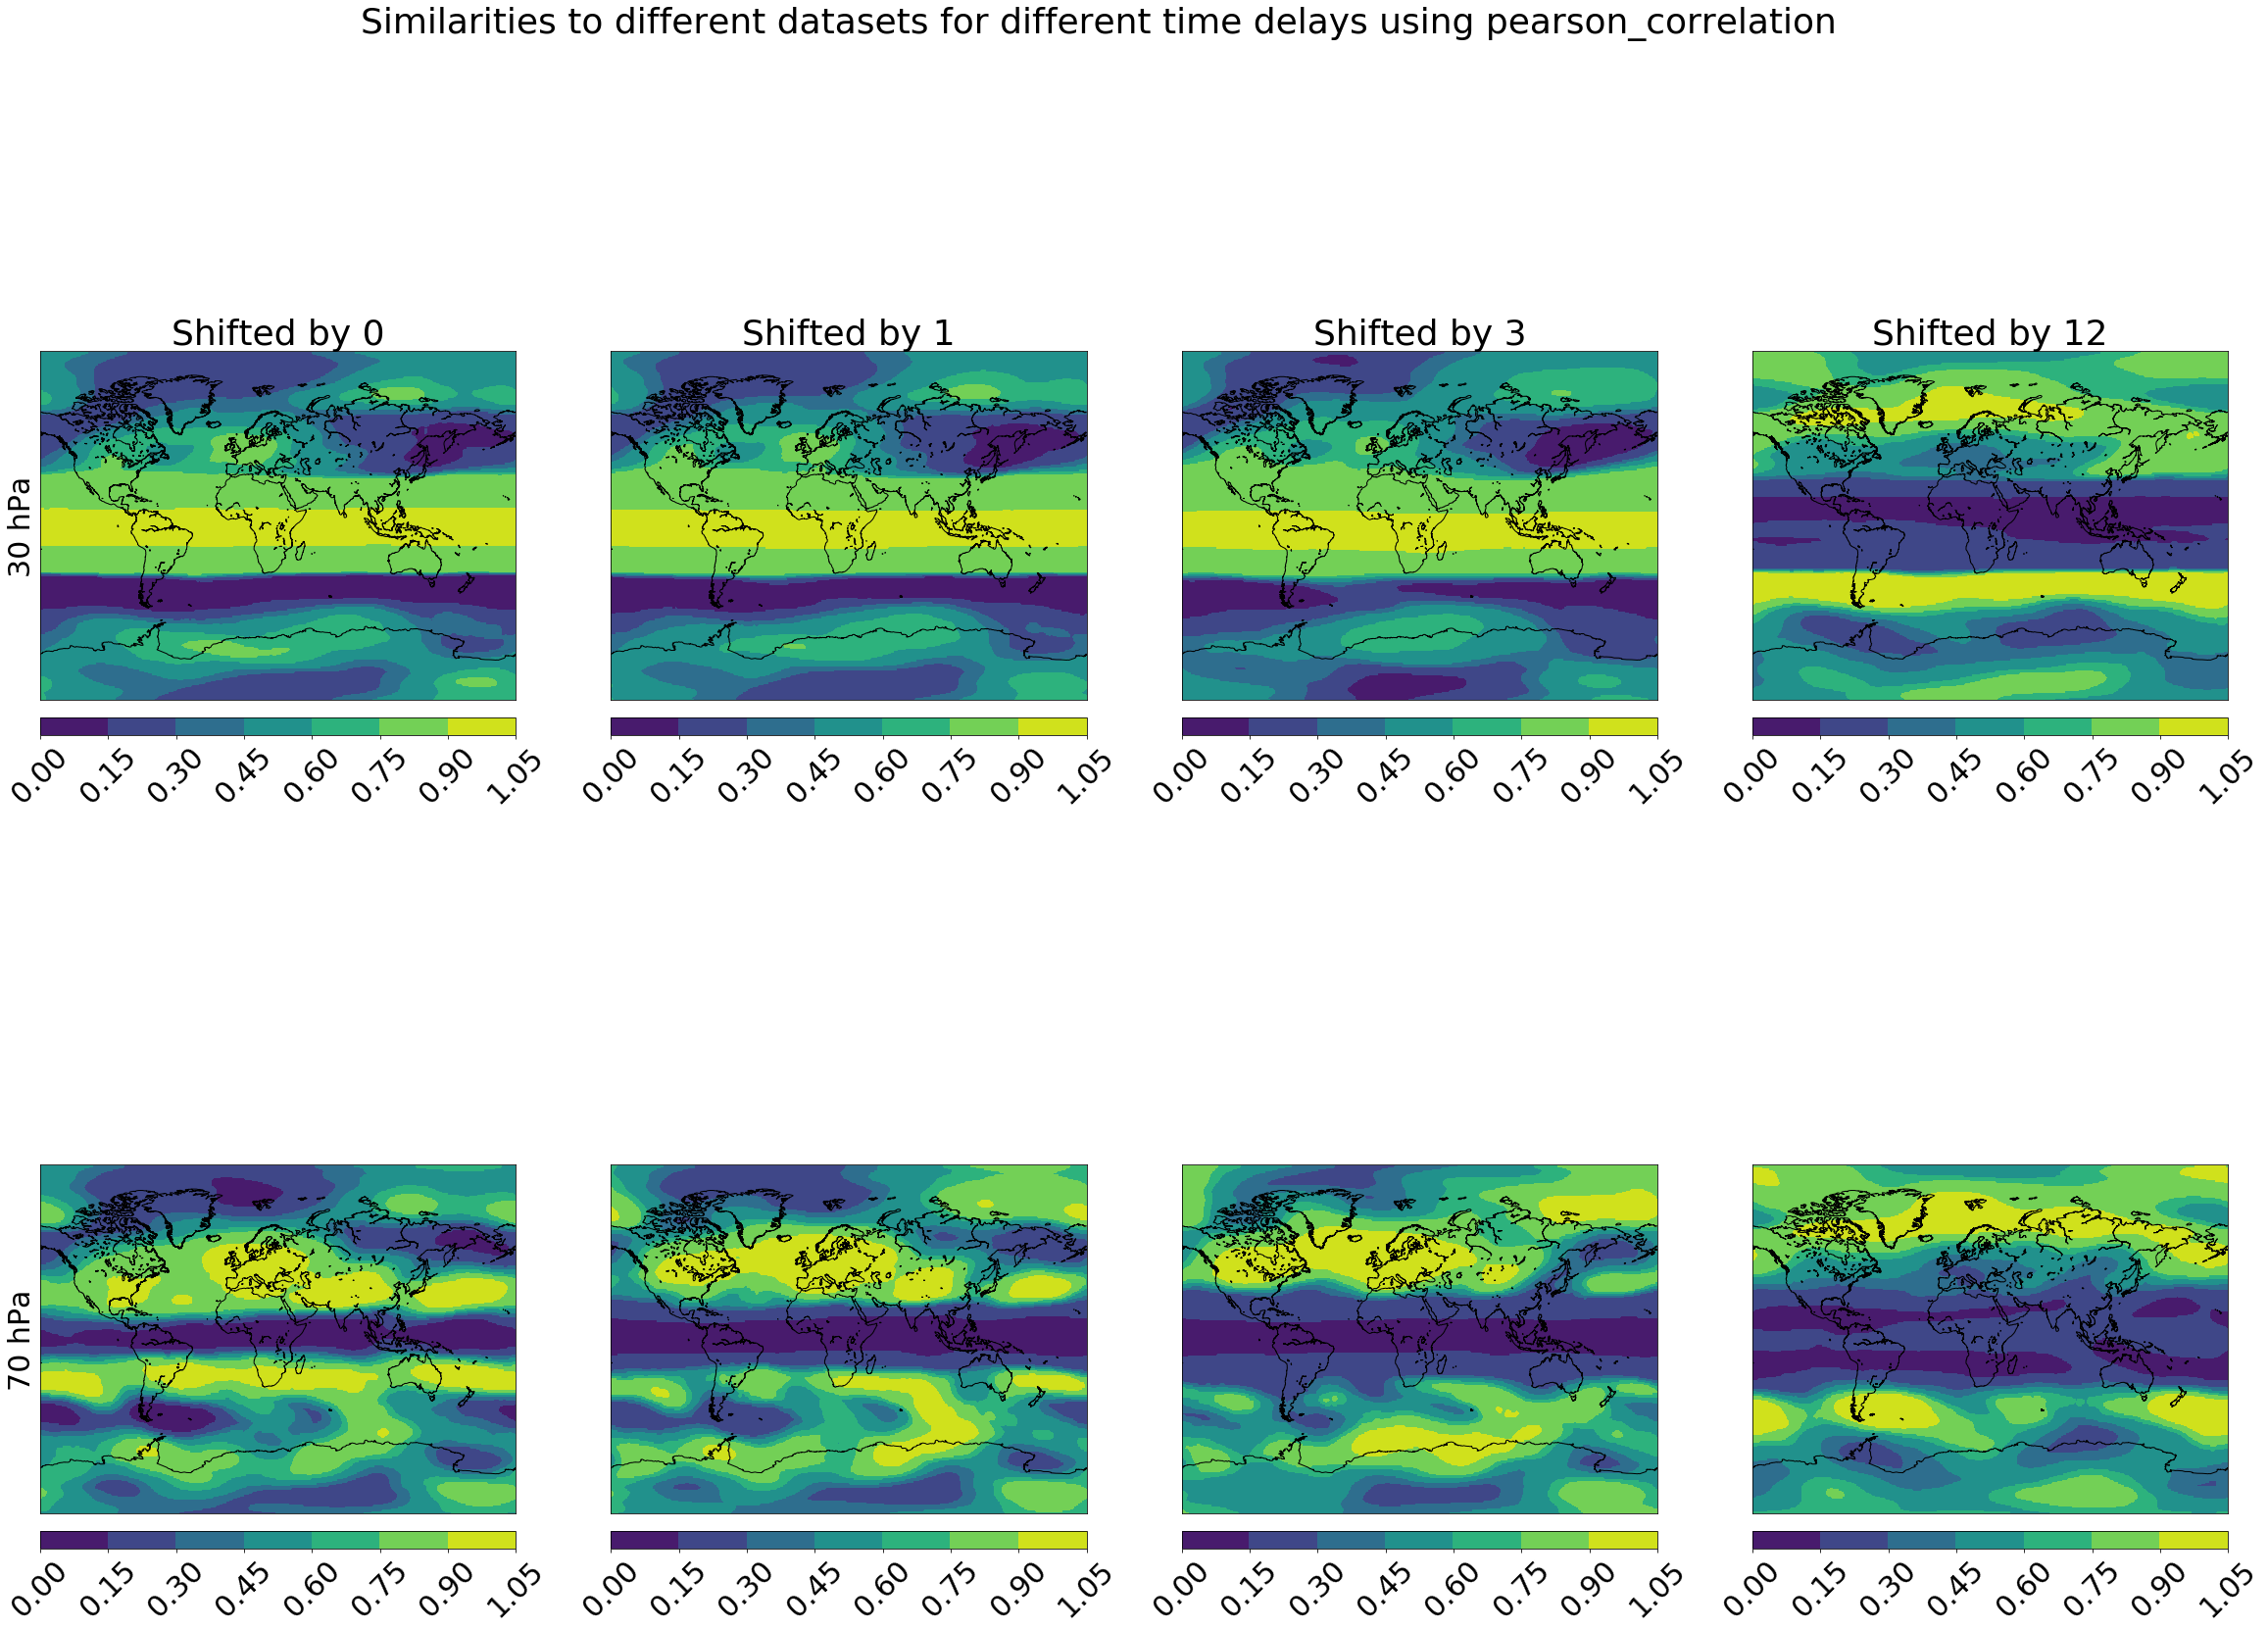

In [12]:
plots.plot_time_delayed_similarities_to_different_datasets(datasets, dataset_labels, qbo_equator, time_shifts, measure)

<h3>Same procedure, but with Mutual Information</h3>

In [13]:
measure = sim.mutual_information

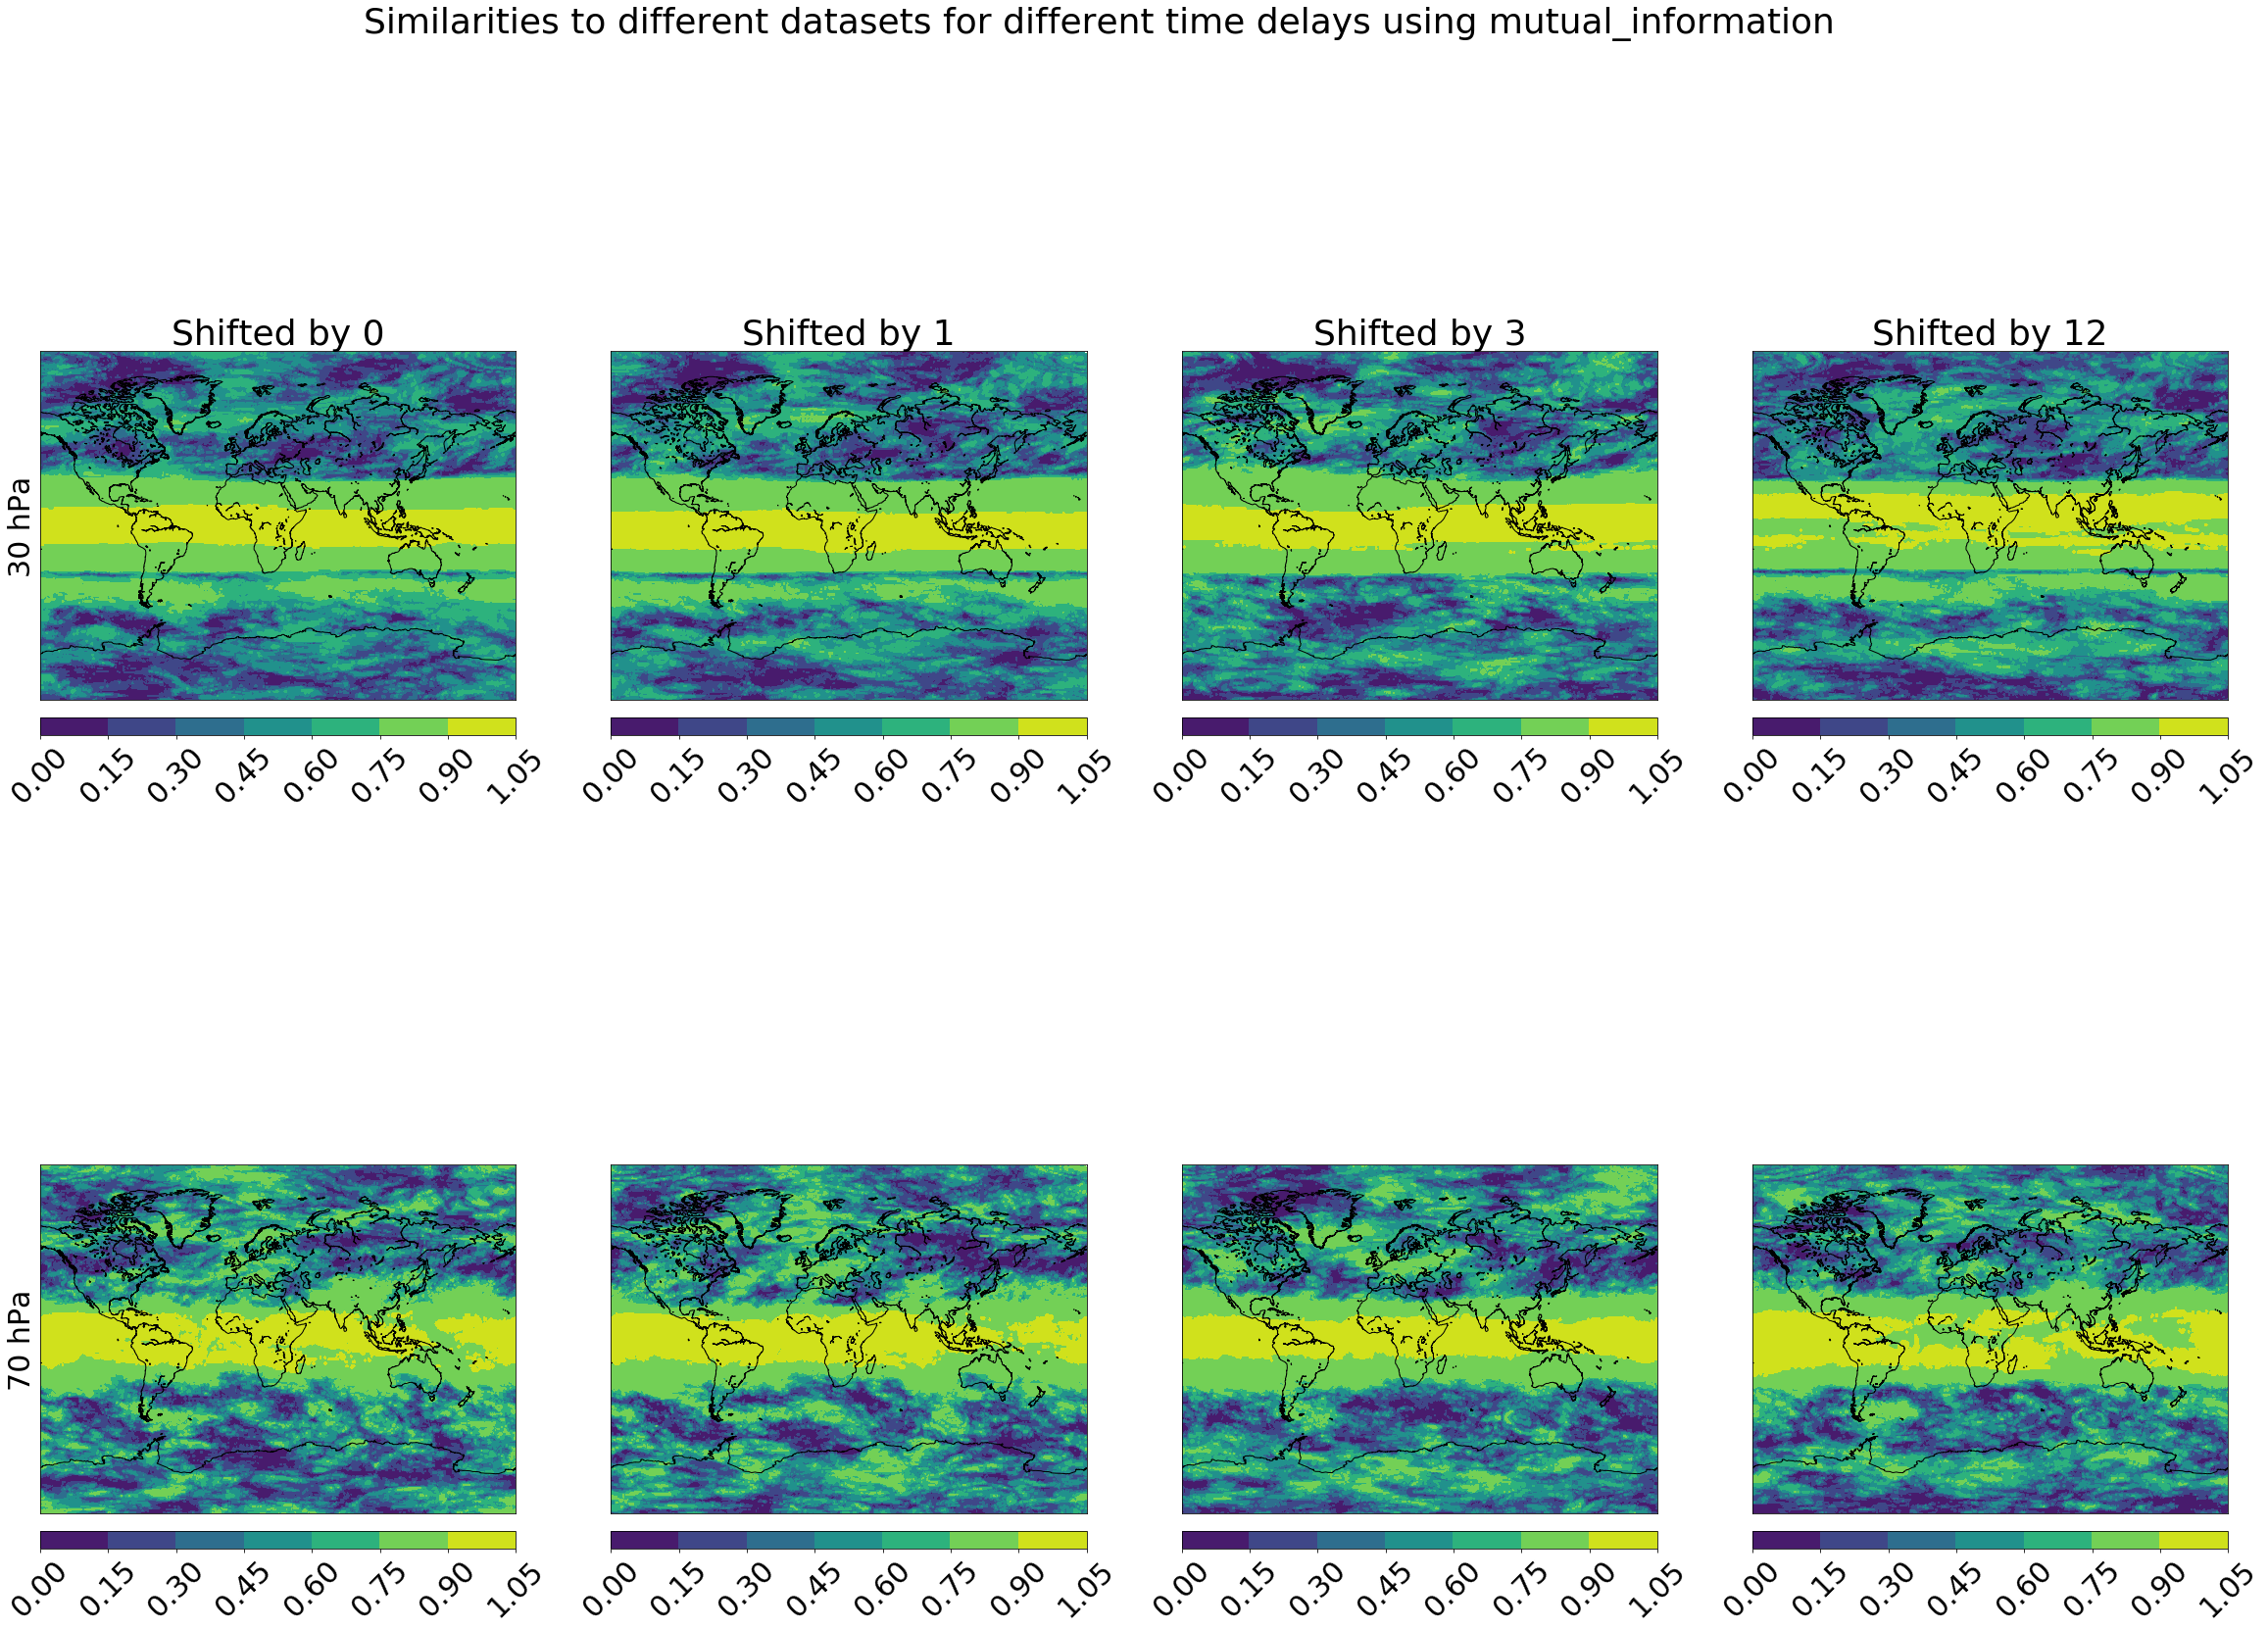

In [14]:
plots.plot_time_delayed_similarities_to_different_datasets(datasets, dataset_labels, qbo_equator, time_shifts, measure)